<a href="https://colab.research.google.com/github/billanel/ProjetIA/blob/main/GoldAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import EarlyStopping

# Data Exploration

In [ ]:
# Mounting Google Drive and reading CSV file
from google.colab import drive
drive.mount('/content/drive')
file_path_drive = '/content/drive/MyDrive/GoldPriceAI/GLD_ETF.csv'
df = pd.read_csv(file_path_drive, na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

Mounted at /content/drive


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
# Reading CSV file from Local Environment
file_path = '/content/GLD_ETF.csv'
df = pd.read_csv(file_path, na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


**Note :** The column 'Date' became the index of the Dataframe

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700


Basic Exploration

In [ ]:
df.shape

(1718, 80)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [ ]:
df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 80, dtype: object

In [ ]:
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64

In [ ]:
df.isnull().values.any()

False

Visualisation

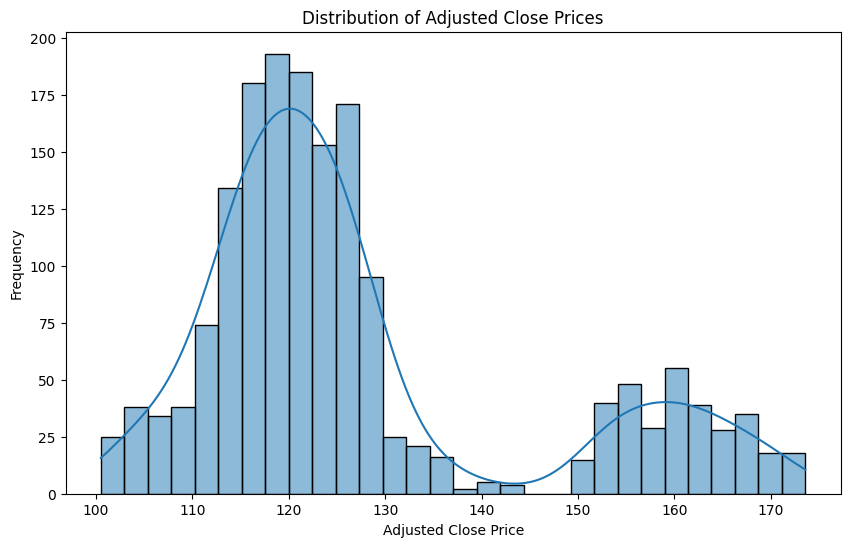

In [ ]:
# Histogram of Gold ETF's Adjusted Close
plt.figure(figsize=(10, 6))
sns.histplot(df['Adj Close'], bins=30, kde=True)
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/distribution_adjclose_prices.png')

plt.show()

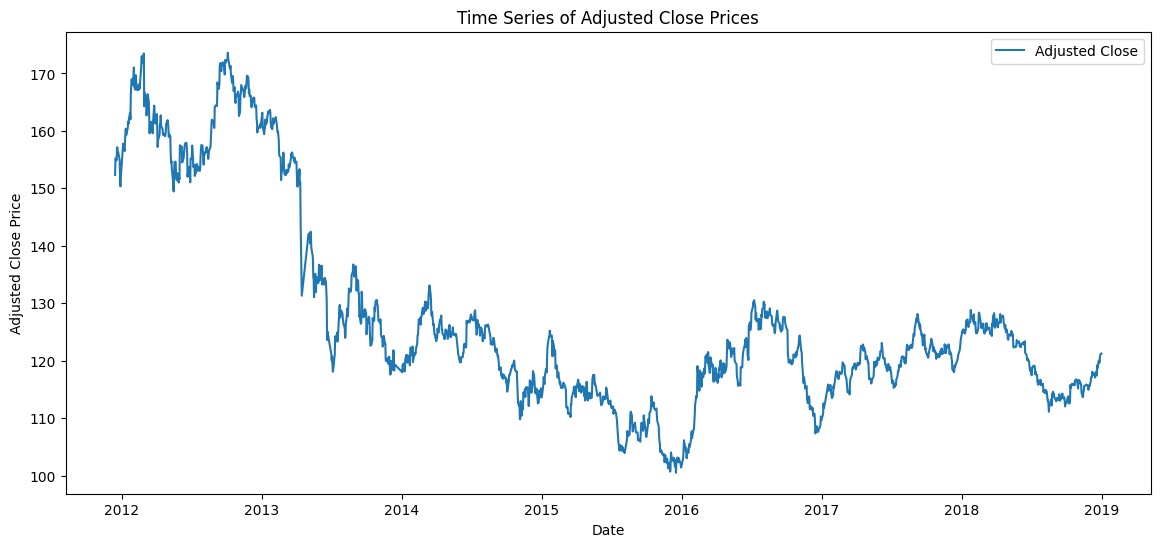

In [ ]:
# Time series plot of Adjusted Close Prices
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Adj Close'], label='Adjusted Close')
plt.title('Time Series of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/timeseries_adjclose_prices.png')

plt.show()

Correlation Analysis

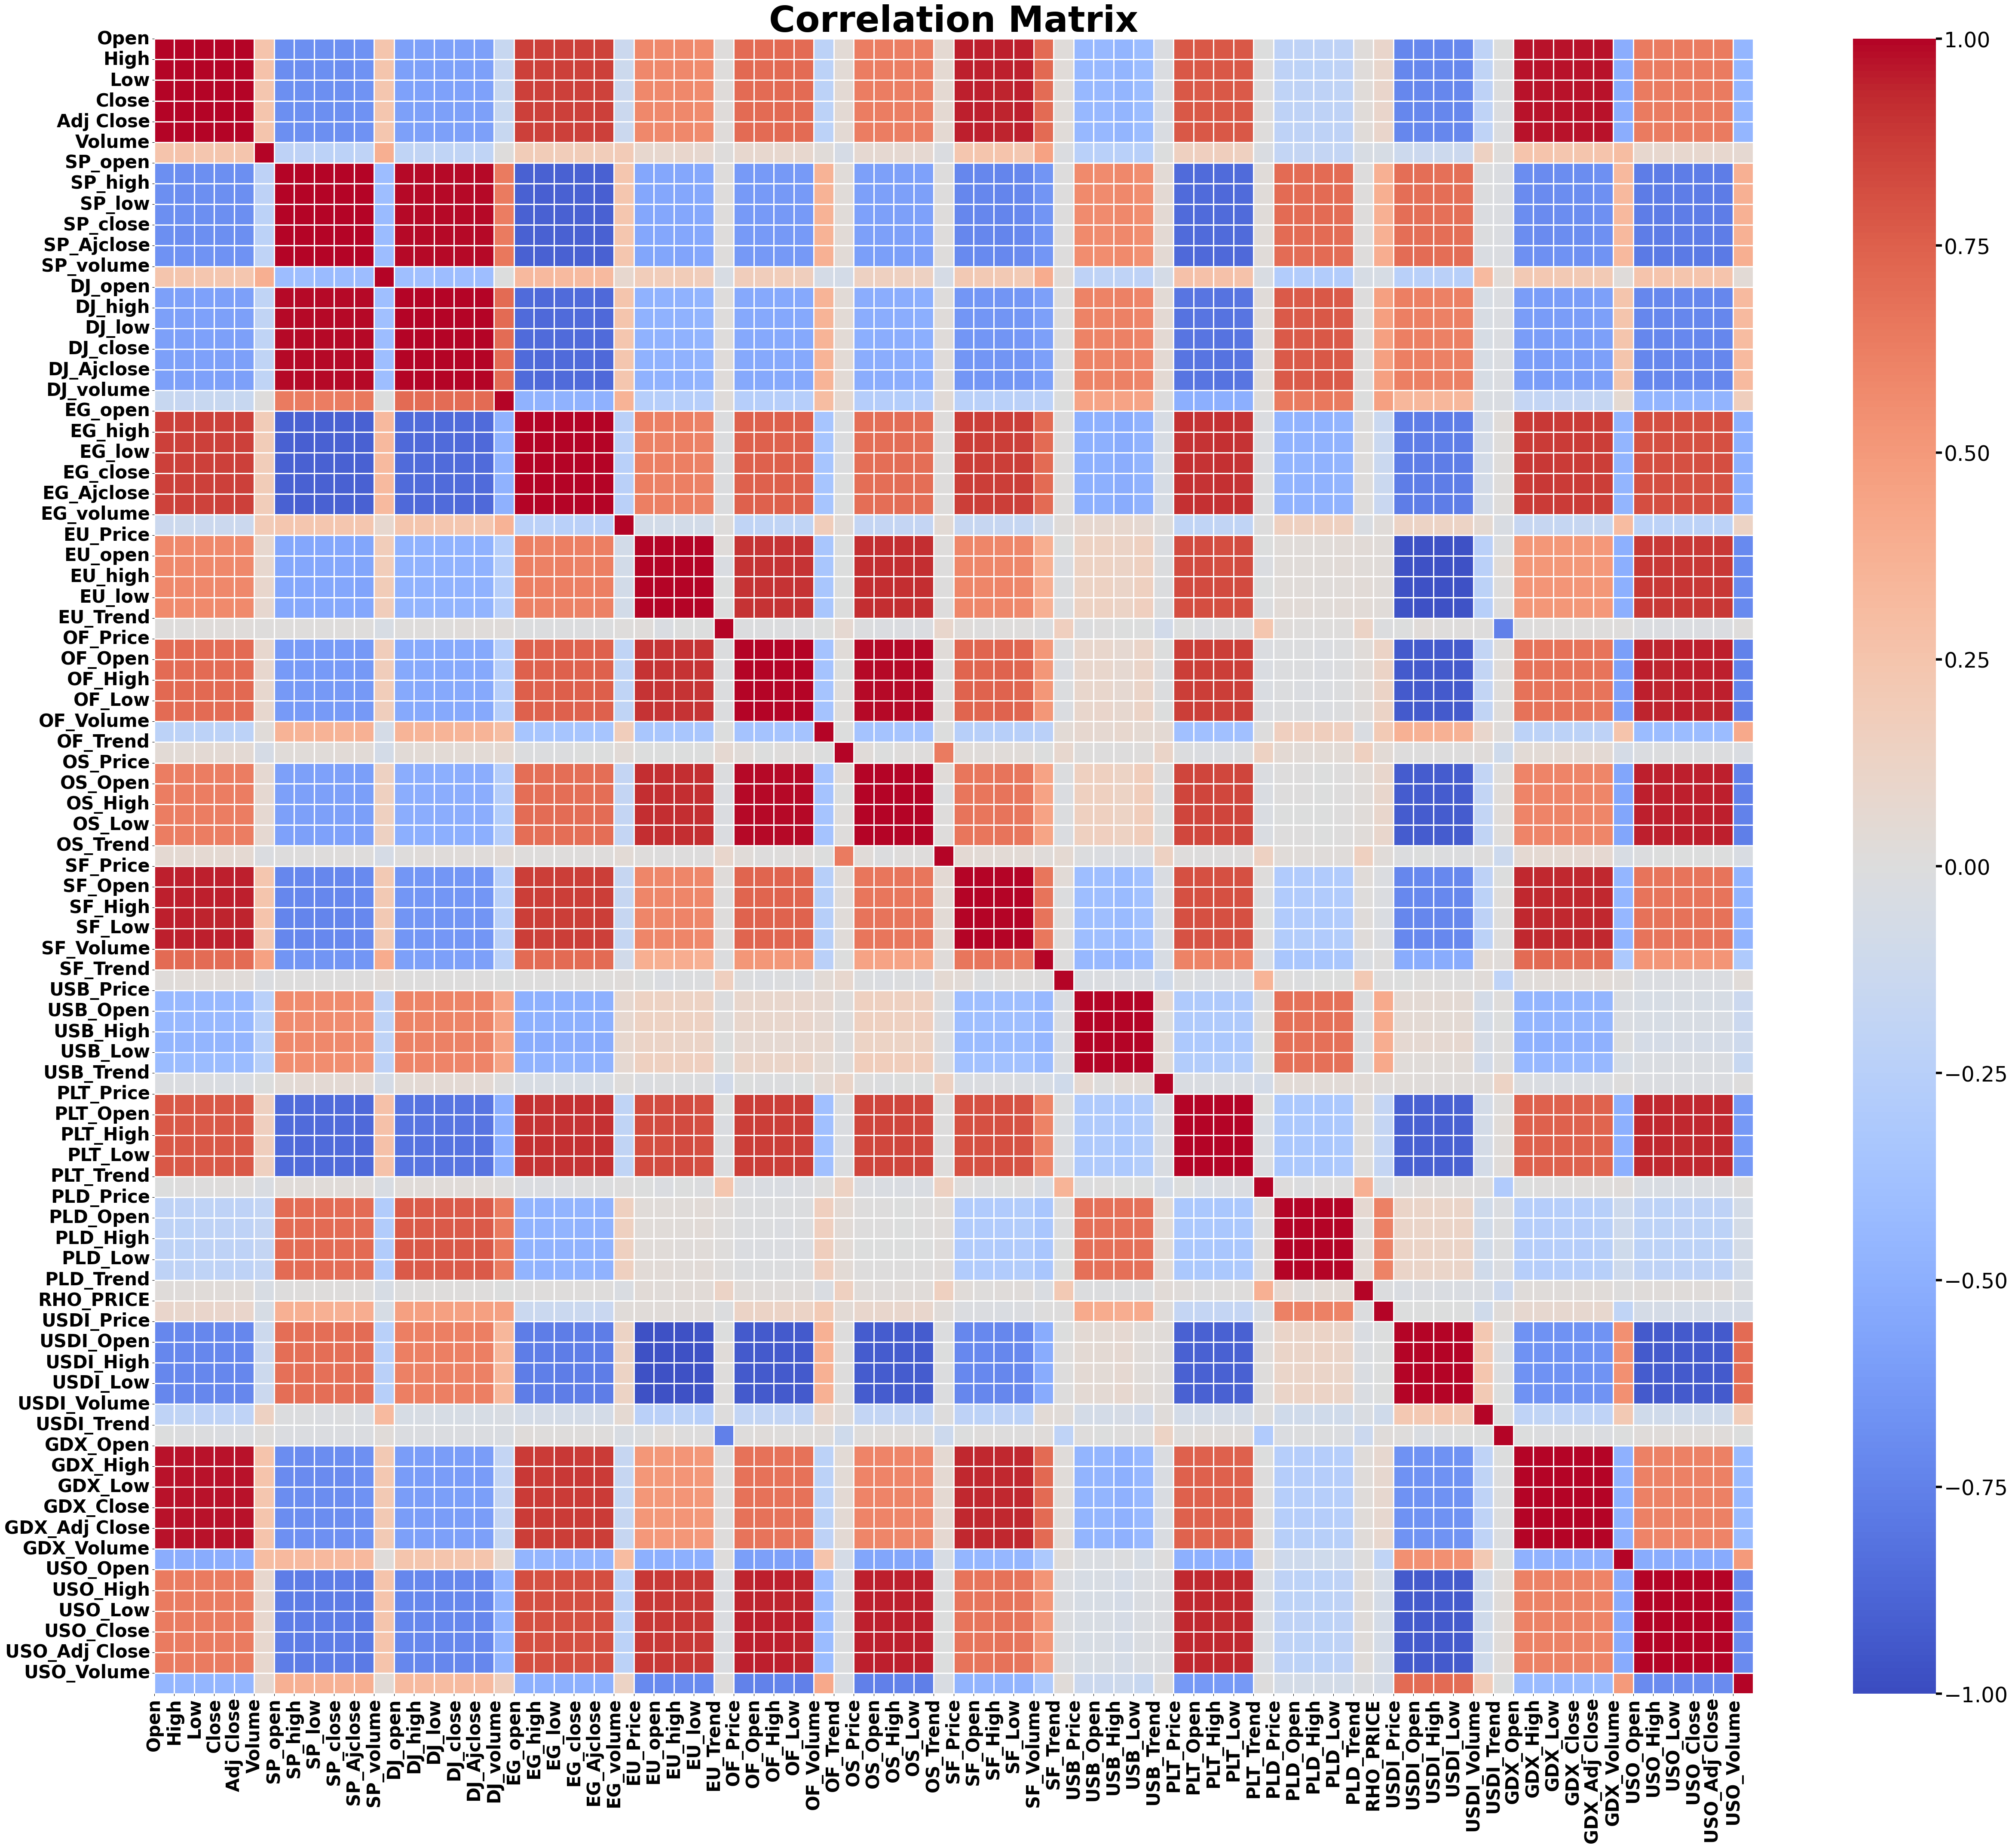

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(60, 50))
heatmap = sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=1, fmt=".2f", vmin=-1, vmax=1)

# Set the title and adjust font size and weight
heatmap.set_title('Correlation Matrix', fontsize=60, fontweight='bold', loc='center')

# Ensure column names are visible and adjust font size and weight
heatmap.set_xticks(range(len(corr_matrix.columns)))
heatmap.set_yticks(range(len(corr_matrix.columns)))
heatmap.set_xticklabels(corr_matrix.columns, fontsize=30, rotation=90, fontweight='bold')
heatmap.set_yticklabels(corr_matrix.columns, fontsize=30, fontweight='bold')

# Access the color bar and modify tick label properties
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=35, width=4)  # Adjust overall color bar properties
cbar.ax.get_yaxis().set_tick_params(which='both', direction='out', width=4, length=10)  # Adjust tick properties

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/correlation_matrix.png')

plt.show()



```
# Correlation of all variables with the target variable 'Adj Close'
```



<ipython-input-13-aeb1969c5e37>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm')


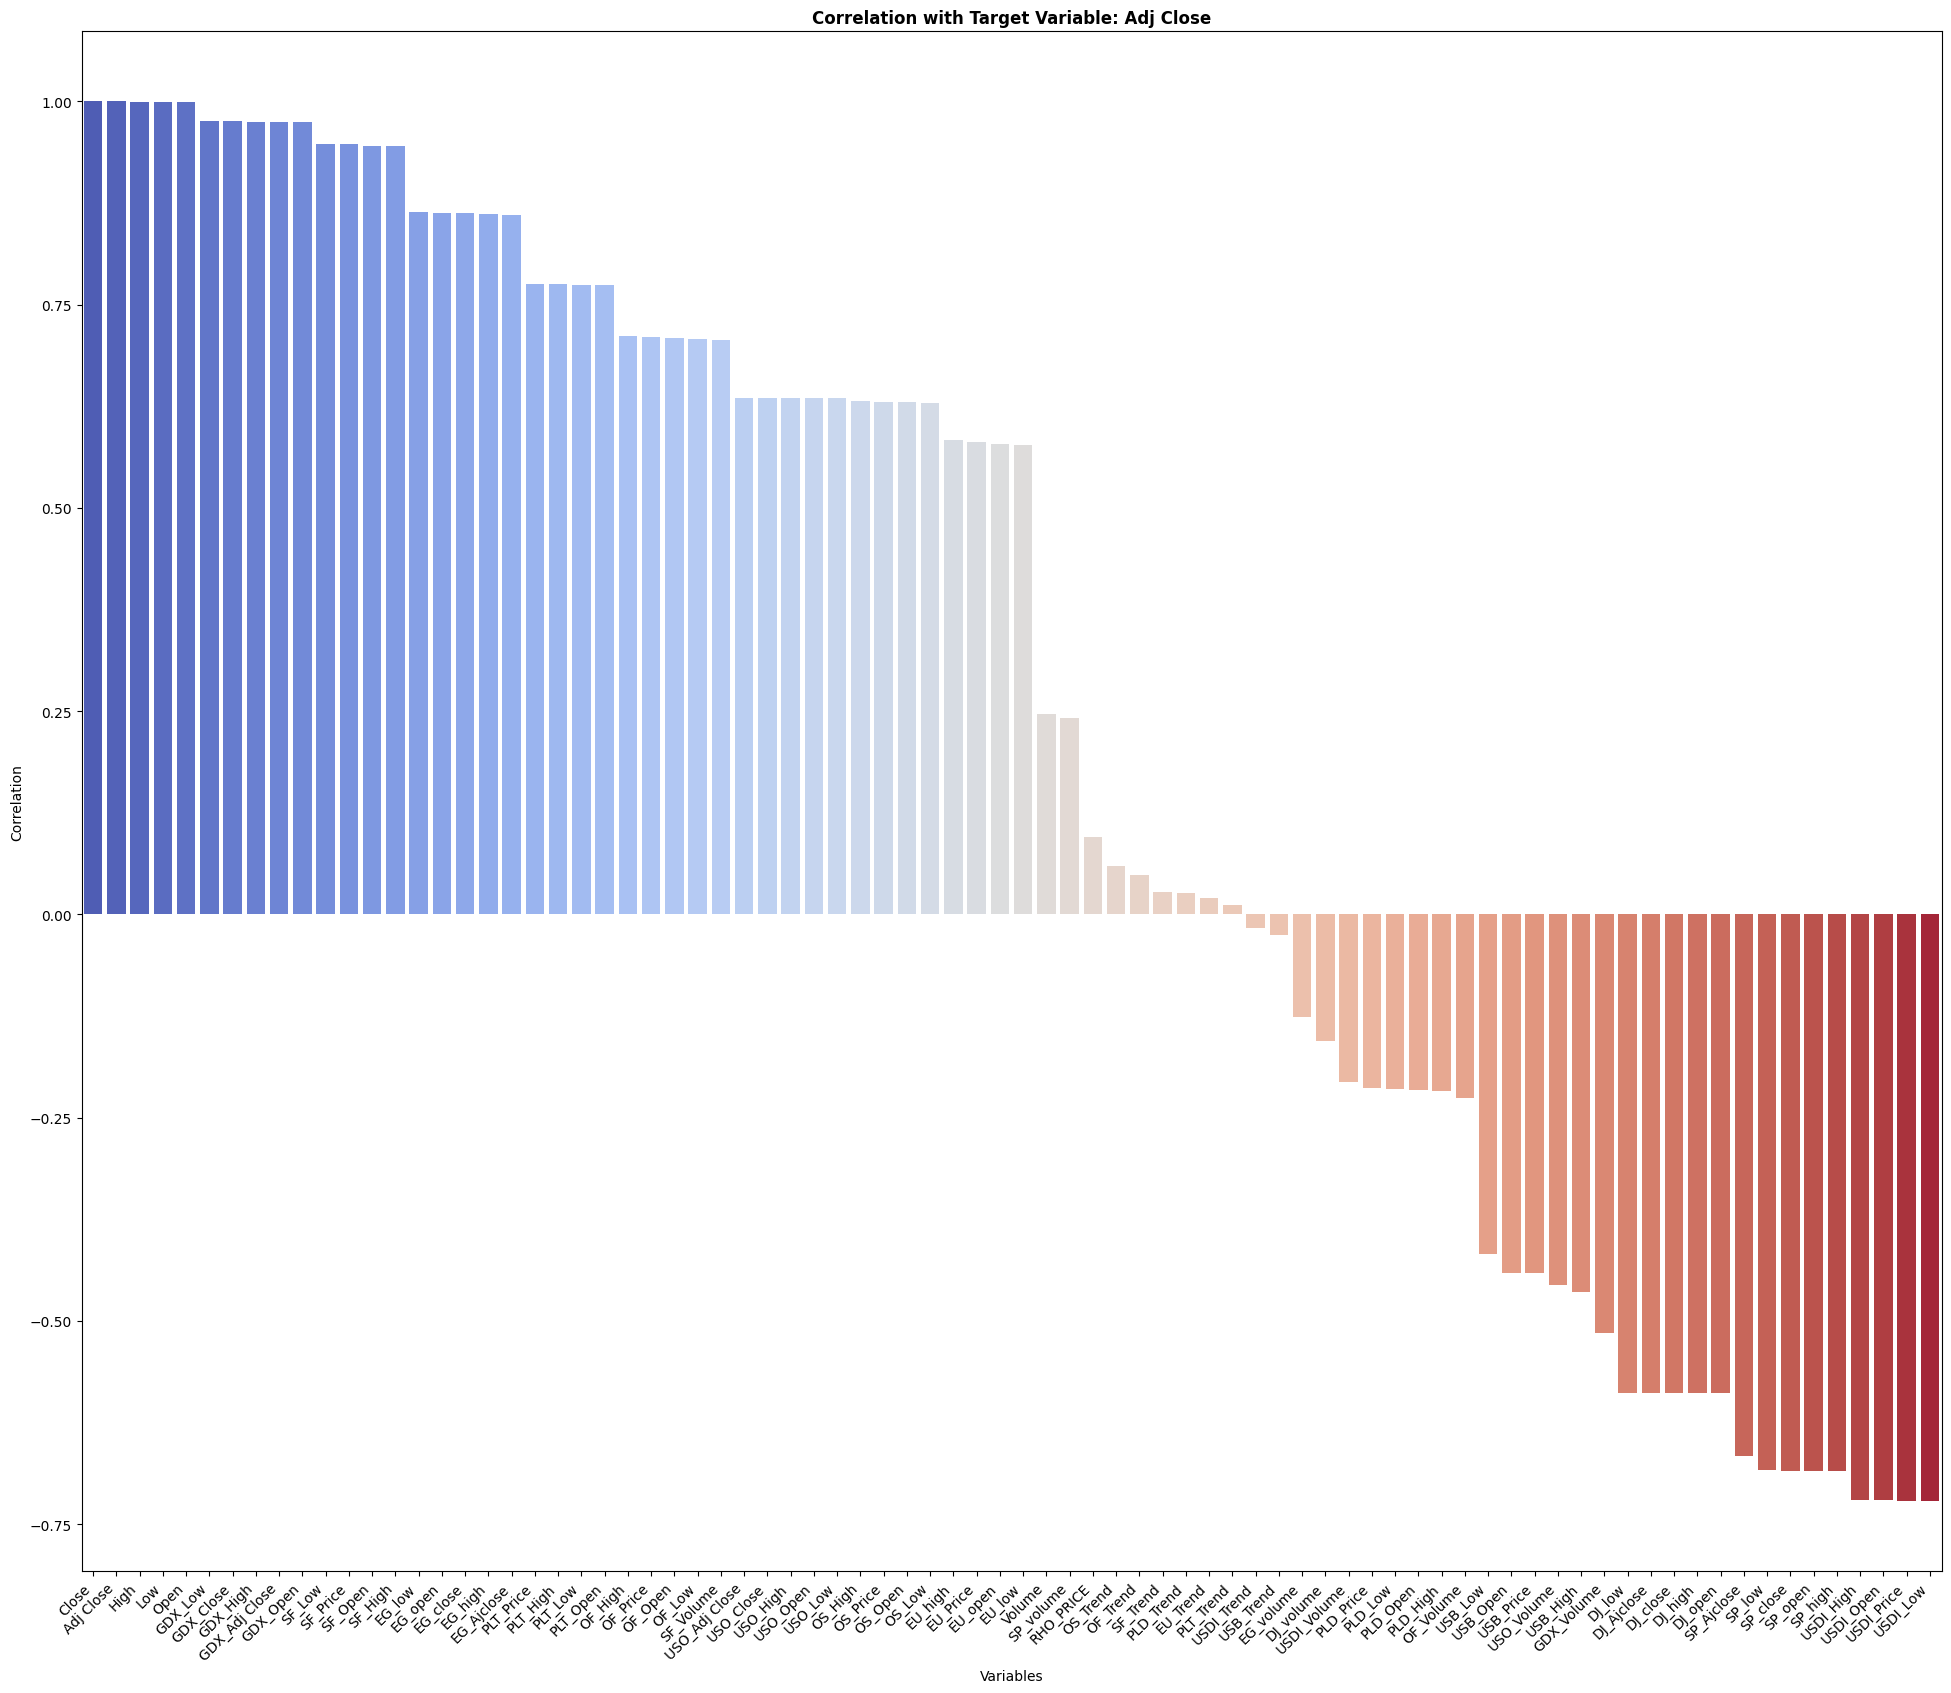

In [ ]:
# Sort the correlation with respect to 'Adj Close'
corr_with_target = corr_matrix['Adj Close'].sort_values(ascending=False)

# Plot a bar plot of the correlation with the target variable
plt.figure(figsize=(24, 20))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm')
plt.title('Correlation with Target Variable: Adj Close', fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/correlation_with_target.png')

plt.show()

In [ ]:
# Positive correlations with 'Adj Close'
positive_corr = corr_matrix['Adj Close'].sort_values(ascending=False)
print("Positive Correlations:")
print(positive_corr[positive_corr > 0])

Positive Correlations:
Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high        

In [ ]:
# Negative correlations with 'Adj Close'
negative_corr = corr_matrix['Adj Close'].sort_values(ascending=True)
print("\nNegative Correlations:")
print(negative_corr[negative_corr < 0])


Negative Correlations:
USDI_Low      -0.722078
USDI_Price    -0.721569
USDI_Open     -0.720140
USDI_High     -0.720023
SP_high       -0.684904
SP_open       -0.684618
SP_close      -0.684284
SP_low        -0.683750
SP_Ajclose    -0.666071
DJ_open       -0.588800
DJ_high       -0.588778
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_low        -0.588157
GDX_Volume    -0.514616
USB_High      -0.464116
USO_Volume    -0.456193
USB_Price     -0.441347
USB_Open      -0.440822
USB_Low       -0.417352
OF_Volume     -0.225436
PLD_High      -0.217490
PLD_Open      -0.216426
PLD_Low       -0.214919
PLD_Price     -0.213179
USDI_Volume   -0.205954
DJ_volume     -0.155526
EG_volume     -0.126586
USB_Trend     -0.025933
USDI_Trend    -0.016641
Name: Adj Close, dtype: float64


Feature Relationships



```
# The purpose is to visually explore the relationship or correlation between variables and even outliers, and the interpretation will depend on the pattern observed in the plot.
```



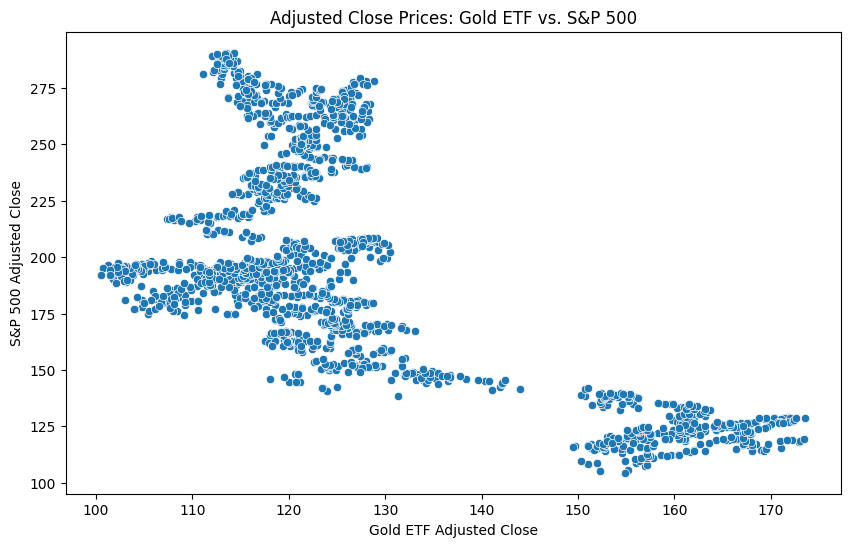

In [ ]:
# Scatter plot of Gold ETF's Adjusted Close and S&P 500 Adjusted Close
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='SP_Ajclose', data=df)
plt.title('Adjusted Close Prices: Gold ETF vs. S&P 500')
plt.xlabel('Gold ETF Adjusted Close')
plt.ylabel('S&P 500 Adjusted Close')

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/adjclose_vs_spadjclose.png')

plt.show()

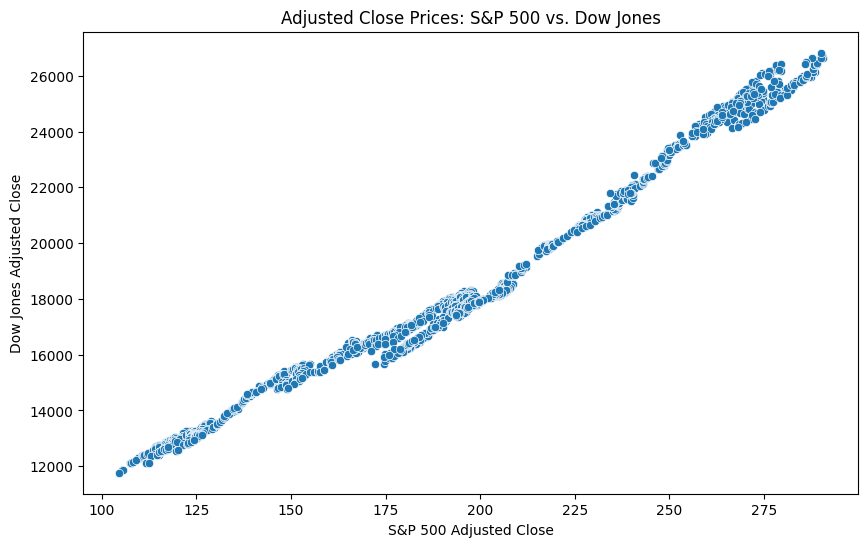

In [ ]:
# Scatter plot of S&P 500 Adjusted Close and Dow Jones Adjusted Close
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SP_Ajclose', y='DJ_Ajclose', data=df)
plt.title('Adjusted Close Prices: S&P 500 vs. Dow Jones')
plt.xlabel('S&P 500 Adjusted Close')
plt.ylabel('Dow Jones Adjusted Close')

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/adjclose_vs_djadjclose.png')

plt.show()

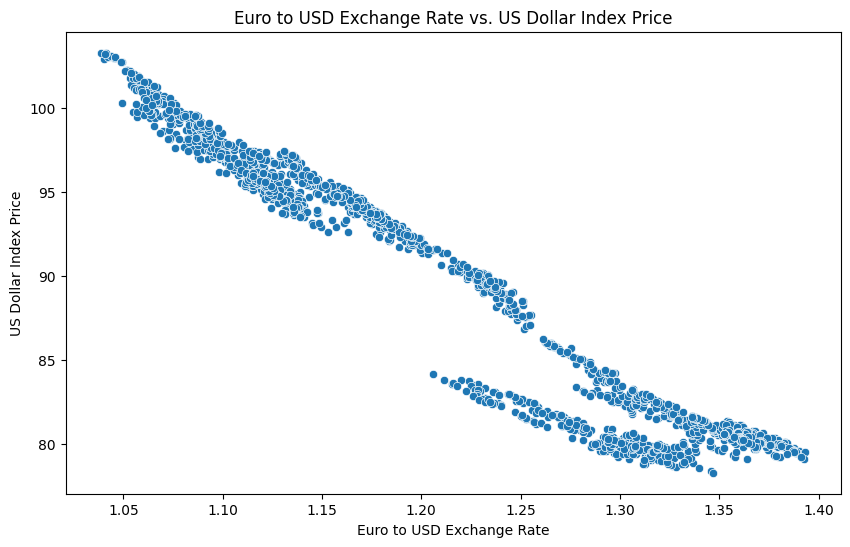

In [ ]:
# Scatter plot of Euro to USD Exchange Rate and US Dollar Index Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EU_Price', y='USDI_Price', data=df)
plt.title('Euro to USD Exchange Rate vs. US Dollar Index Price')
plt.xlabel('Euro to USD Exchange Rate')
plt.ylabel('US Dollar Index Price')

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/EUvsUSDI.png')

plt.show()

Outliers Detection



```
# Individual points beyond the whiskers are potential outliers. Outliers can be indicative of unusual or extreme values in the dataset.
```



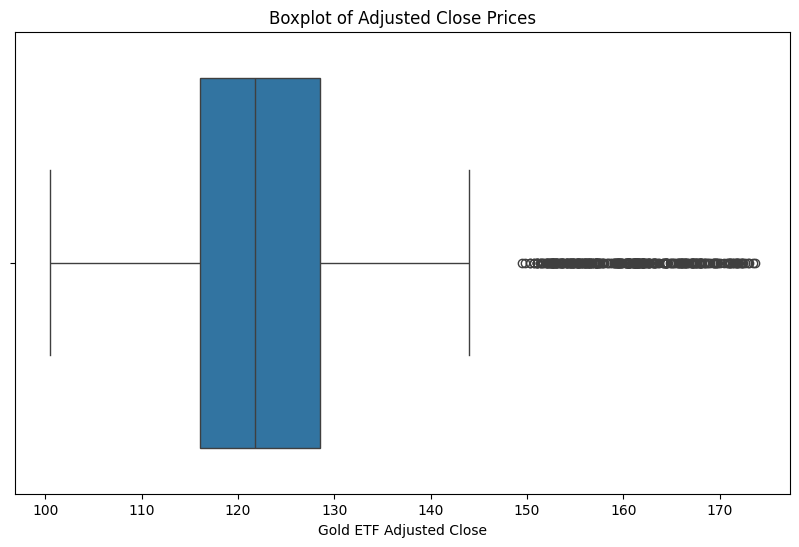

In [ ]:
# Example: Boxplot of Gold ETF's Adjusted Close
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Adj Close'])
plt.title('Boxplot of Adjusted Close Prices')
plt.xlabel('Gold ETF Adjusted Close')

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/boxplot_adjclose.png')

plt.show()

Speed of Changes

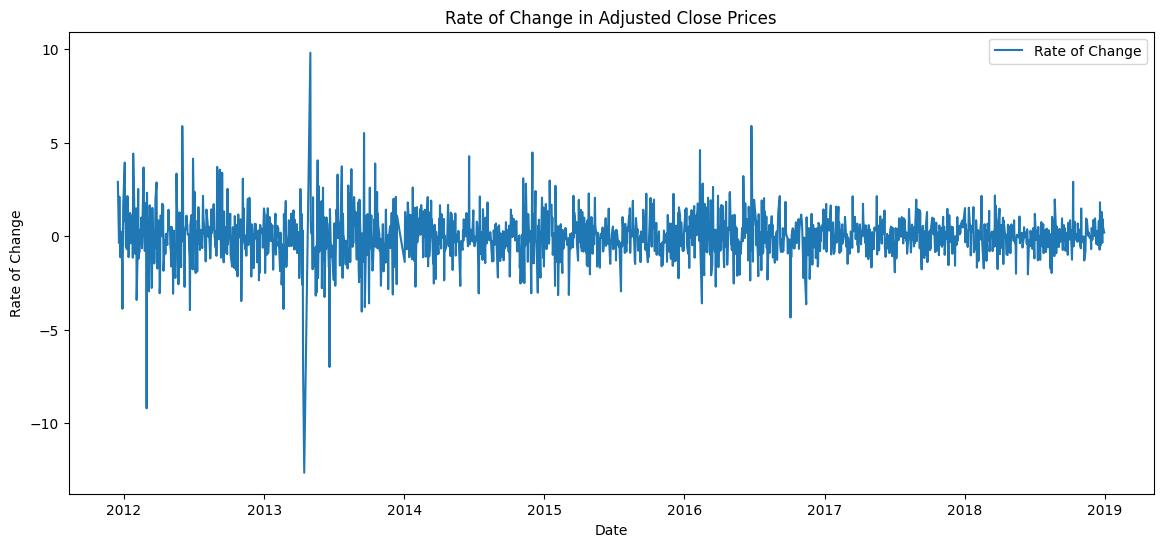

In [ ]:
# Derivative Analysis
# Calculate the first-order derivative
Price_Diff = df['Adj Close'].diff()

# Plot the rate of change
plt.figure(figsize=(14, 6))
plt.plot(df.index, Price_Diff, label='Rate of Change')
plt.title('Rate of Change in Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Rate of Change')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/change_rate.png')

plt.show()

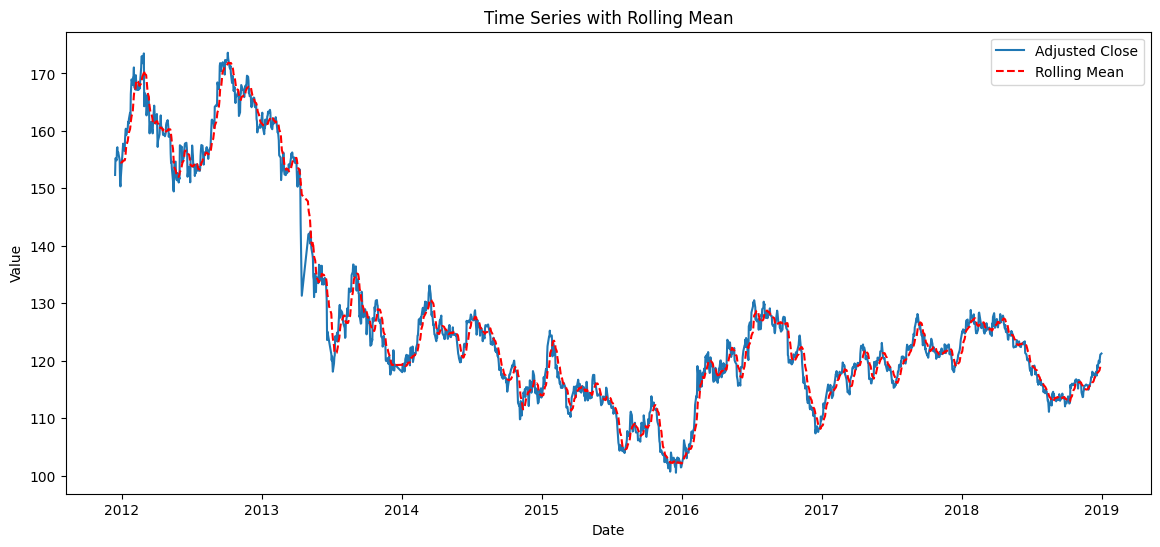

In [ ]:
# Rolling Windows
# Calculate rolling mean
Rolling_Mean = df['Adj Close'].rolling(window=10).mean()

# Plot the original data and rolling mean
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Adj Close'], label='Adjusted Close')
plt.plot(df.index, Rolling_Mean, label='Rolling Mean', linestyle='--', color='red')
plt.title('Time Series with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/rolling_window.png')

plt.show()

In [ ]:
df.shape

(1718, 80)

# Data Preprocessing

Technical Indicators



```
# The Simple Moving Average is a commonly used indicator that smoothens price data to create a single flowing line. It is calculated by adding the closing prices of a security for a given number of time periods and then dividing the total by the number of time periods.
```



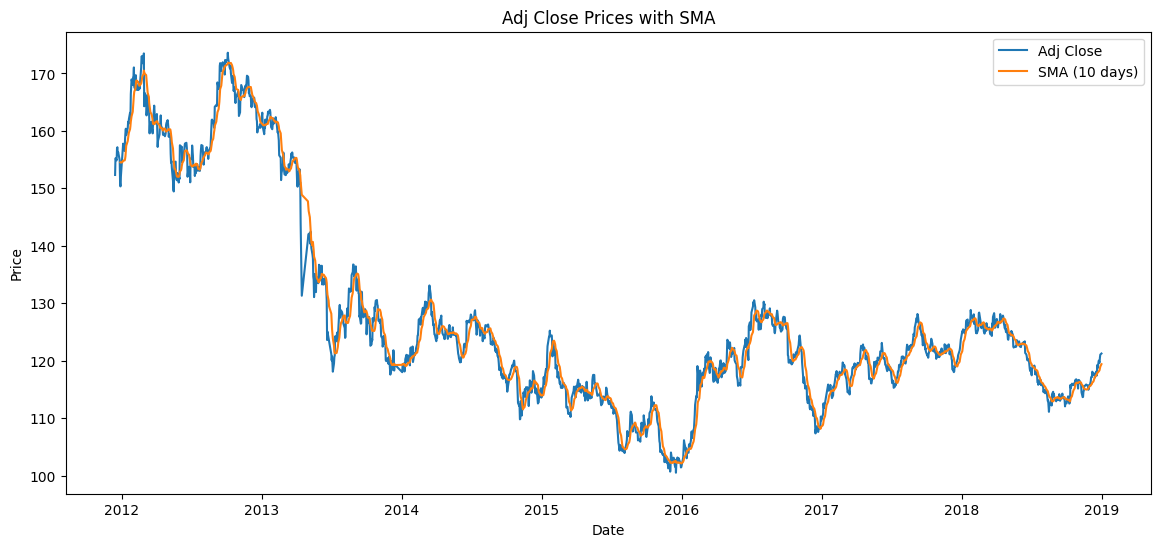

In [ ]:
# Simple Moving Average SMA
# Calculate SMA with a specific window size (number of days)
window_size = 10
SMA = df['Adj Close'].rolling(window=window_size).mean()

# Plot the 'Adj Close' and SMA
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.plot(df.index, SMA, label=f'SMA ({window_size} days)')
plt.title('Adj Close Prices with SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/sma.png')

plt.show()



```
# The Relative Strength Index is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions in a market, helping traders and analysts identify potential reversal points.
```



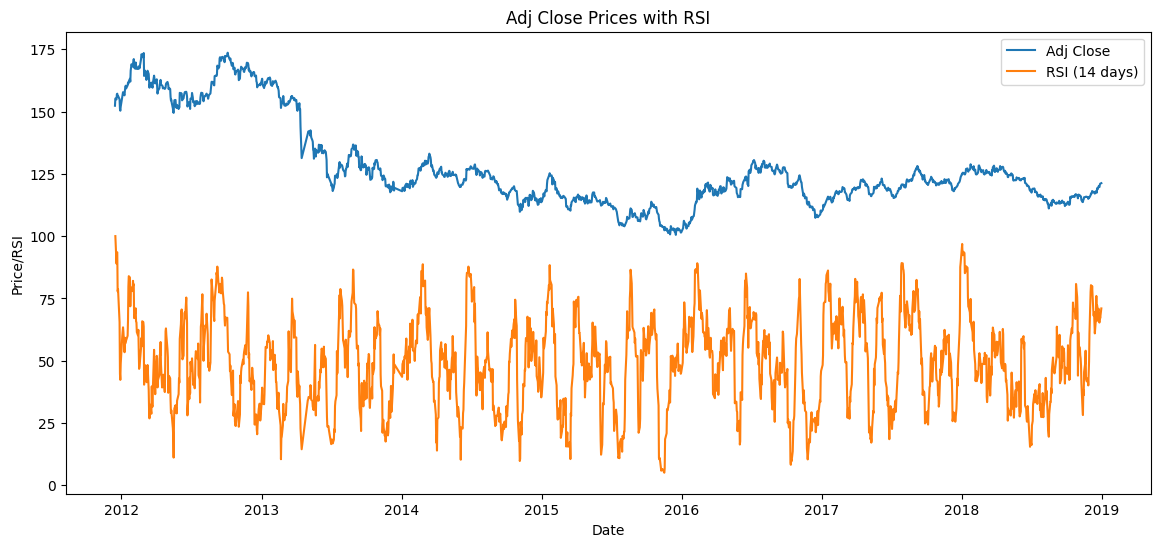

In [ ]:
# Relative Strength Index RSI
def calculate_rsi(data, column_name, window_size):
    # Calculate daily price changes
    delta = data[column_name].diff()

    # Calculate gains (positive changes) and losses (negative changes)
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)

    # Calculate average gains and average losses over the specified window
    avg_gains = gains.rolling(window=window_size, min_periods=1).mean()
    avg_losses = losses.rolling(window=window_size, min_periods=1).mean()

    # Calculate relative strength (RS)
    rs = avg_gains / avg_losses

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Specify the desired window size
window_size = 14

# Calculate RSI for 'Adj Close' with the specified window size
RSI = calculate_rsi(df, 'Adj Close', window_size)

# Plot the 'Adj Close' and RSI
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.plot(df.index, RSI, label=f'RSI ({window_size} days)')
plt.title('Adj Close Prices with RSI')
plt.xlabel('Date')
plt.ylabel('Price/RSI')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/rsi.png')

plt.show()



```
# The Moving Average Convergence Divergence is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price.
```



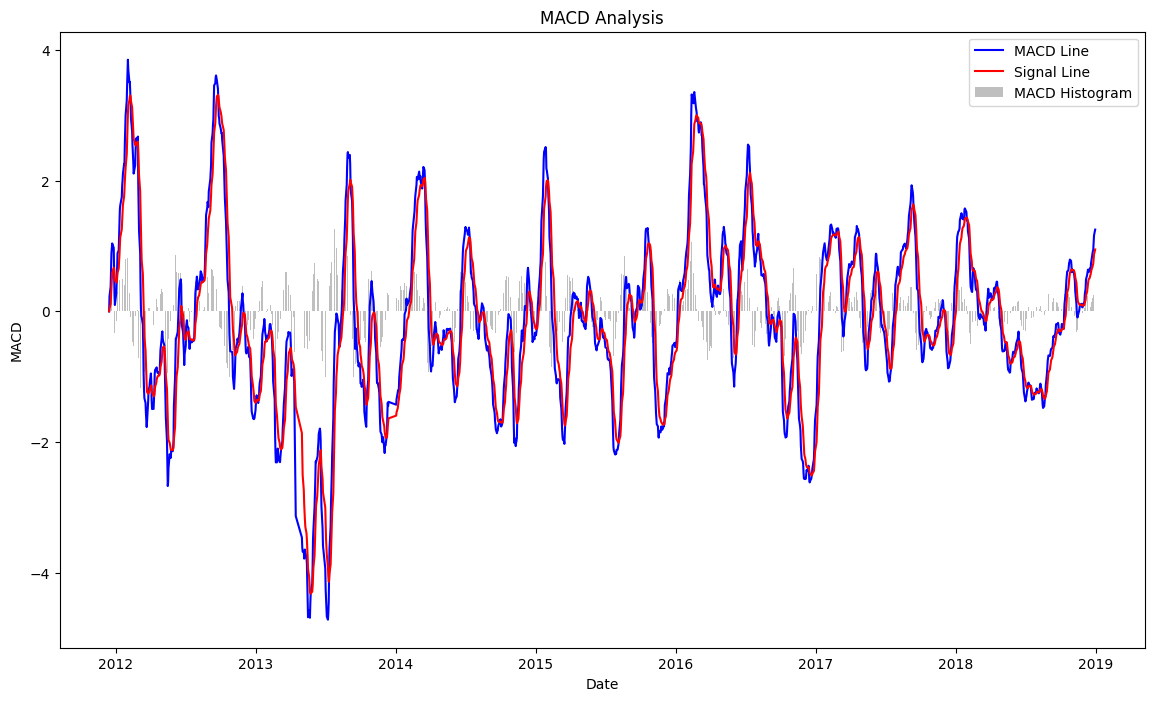

In [ ]:
# Moving Average Convergence Divergence MACD
def calculate_macd(data, column_name, short_window=12, long_window=26, signal_window=9):
    # Calculate short-term (12-day) EMA
    short_ema = data[column_name].ewm(span=short_window, adjust=False).mean()

    # Calculate long-term (26-day) EMA
    long_ema = data[column_name].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    macd_line = short_ema - long_ema

    # Calculate signal line
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD histogram
    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

# Calculate MACD for 'Adj Close'
macd_line, signal_line, macd_histogram = calculate_macd(df, 'Adj Close')

# Plot MACD, signal line, and histogram
plt.figure(figsize=(14, 8))
#plt.plot(df.index, df['Adj Close'], label='Adj Close', color='black', linewidth=1.5)
plt.plot(df.index, macd_line, label='MACD Line', color='blue')
plt.plot(df.index, signal_line, label='Signal Line', color='red')
plt.bar(df.index, macd_histogram, label='MACD Histogram', color='gray', alpha=0.5)

plt.title('MACD Analysis')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/macd.png')

plt.show()




```
# Bollinger Bands consist of a middle band (typically a simple moving average) and two outer bands representing standard deviations above and below the middle band.
```



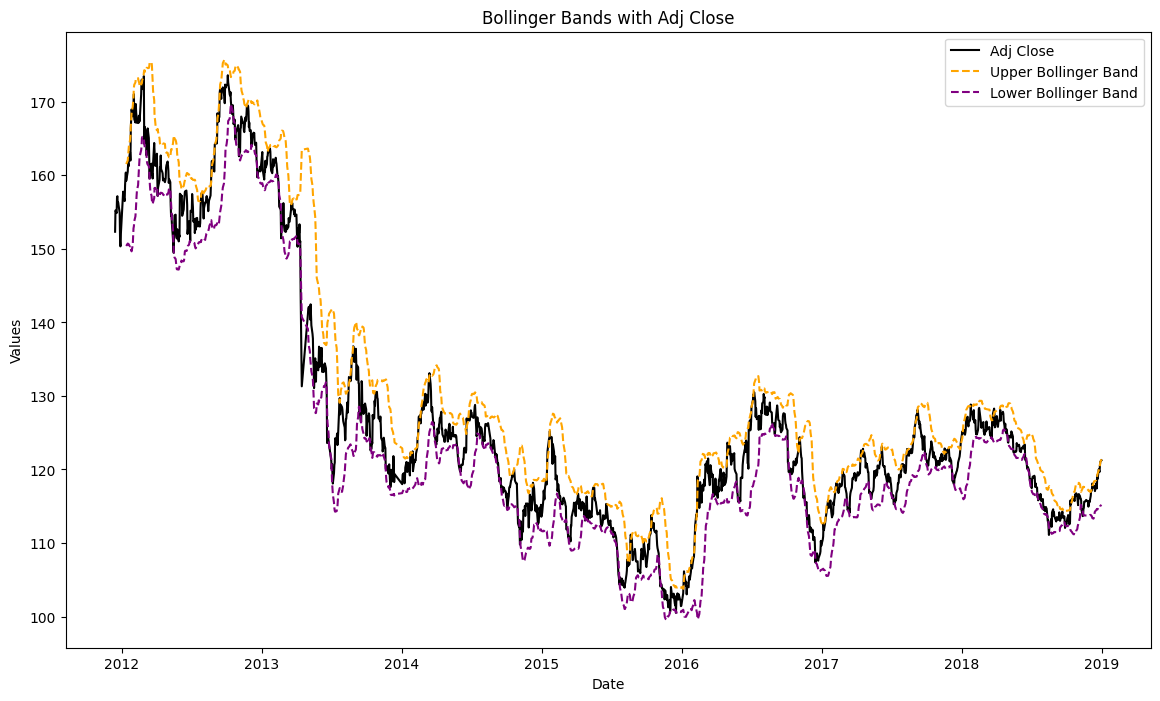

In [ ]:
# Bollinger Bands
def calculate_bollinger_bands(data, column_name, window_size=20, num_std_dev=2):
    # Calculate rolling mean and standard deviation
    rolling_mean = data[column_name].rolling(window=window_size).mean()
    rolling_std = data[column_name].rolling(window=window_size).std()

    # Calculate upper and lower Bollinger Bands
    upper_band = rolling_mean + (num_std_dev * rolling_std)
    lower_band = rolling_mean - (num_std_dev * rolling_std)

    return upper_band, lower_band

# Calculate Bollinger Bands for 'Adj Close'
upper_band, lower_band = calculate_bollinger_bands(df, 'Adj Close')

# Plot 'Adj Close', Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='black', linewidth=1.5)
plt.plot(df.index, upper_band, label='Upper Bollinger Band', color='orange', linestyle='--')
plt.plot(df.index, lower_band, label='Lower Bollinger Band', color='purple', linestyle='--')

plt.title('Bollinger Bands with Adj Close')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/bollinger_bands.png')

plt.show()

In [ ]:
# Normalisation of data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_scaled.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume       float64
Length: 80, dtype: object

In [ ]:
# Defining features and target
exclude_columns = [
    'Volume', 'SP_volume', 'RHO_PRICE', 'OS_Trend', 'OF_Trend', 'SF_Trend',
    'PLD_Trend', 'EU_Trend', 'PLT_Trend', 'OF_Volume', 'PLD_High', 'PLD_Open',
    'PLD_Low', 'PLD_Price', 'USDI_Volume', 'DJ_volume', 'EG_volume', 'USB_Trend',
    'USDI_Trend', 'USB_Low'
]
X = df_scaled.drop(exclude_columns, axis=1)
y = df_scaled['Adj Close']

In [ ]:
print(X.shape, y.shape)

(1718, 60) (1718,)


In [ ]:
# Creating sequences for LSTM
def create_sequences(features, target, seq_length):
    X_sequences, y_sequences = [], []
    for i in range(len(features) - seq_length + 1):
        X_seq = features[i:i + seq_length]
        y_seq = target[i + seq_length - 1]
        X_sequences.append(X_seq)
        y_sequences.append(y_seq)
    return np.array(X_sequences), np.array(y_sequences)

sequence_length = 10  # Adjust based on your requirements
X_sequences, y_sequences = create_sequences(X, y, sequence_length)

In [ ]:
print(X_sequences.shape, y_sequences.shape)

(1709, 10, 60) (1709,)


In [ ]:
# Train-test split
train_size = int(len(X_sequences) * 0.8)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, train_size=train_size, shuffle=False)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1367, 10, 60) (1367,)
(342, 10, 60) (342,)


In [ ]:
# Reshaping input features to meet LSTM input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1367, 10, 60) (1367,)
(342, 10, 60) (342,)


# Building LSTM Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with 1 neuron for regression tasks

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
43/43 [==============================] - 1s 32ms/step - loss: 6.7603e-04 - val_loss: 6.6902e-04
Epoch 2/50
43/43 [==============================] - 1s 18ms/step - loss: 5.1269e-04 - val_loss: 3.3607e-04
Epoch 3/50
43/43 [==============================] - 1s 18ms/step - loss: 4.7635e-04 - val_loss: 2.1994e-04
Epoch 4/50
43/43 [==============================] - 1s 18ms/step - loss: 4.7599e-04 - val_loss: 3.5840e-04
Epoch 5/50
43/43 [==============================] - 1s 18ms/step - loss: 3.8727e-04 - val_loss: 9.8977e-04
Epoch 6/50
43/43 [==============================] - 1s 18ms/step - loss: 4.4202e-04 - val_loss: 4.4697e-04
Epoch 7/50
43/43 [==============================] - 1s 19ms/step - loss: 4.1294e-04 - val_loss: 5.6687e-04
Epoch 8/50
43/43 [==============================] - 1s 18ms/step - loss: 4.6810e-04 - val_loss: 2.8931e-04
Epoch 9/50
43/43 [==============================] - 1s 18ms/step - loss: 3.9443e-04 - val_loss: 7.3042e-04
Epoch 10/50
43/43 [==================

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

11/11 [==============================] - 0s 6ms/step - loss: 7.5339e-05
Test Loss: 7.533881580457091e-05


In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions to get them back to the original scale
y_pred_original = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), df_scaled.shape[1]-1)), y_pred), axis=1))[:, -1]
y_test_original = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), df_scaled.shape[1]-1)), y_test.reshape(-1, 1)), axis=1))[:, -1]

11/11 [==============================] - 1s 5ms/step


In [ ]:
# Calculate and print the evaluation metrics (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 948099.0891471109


In [ ]:
# Calculate R-squared
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared: {r2}')

R-squared: 0.9813173266916122


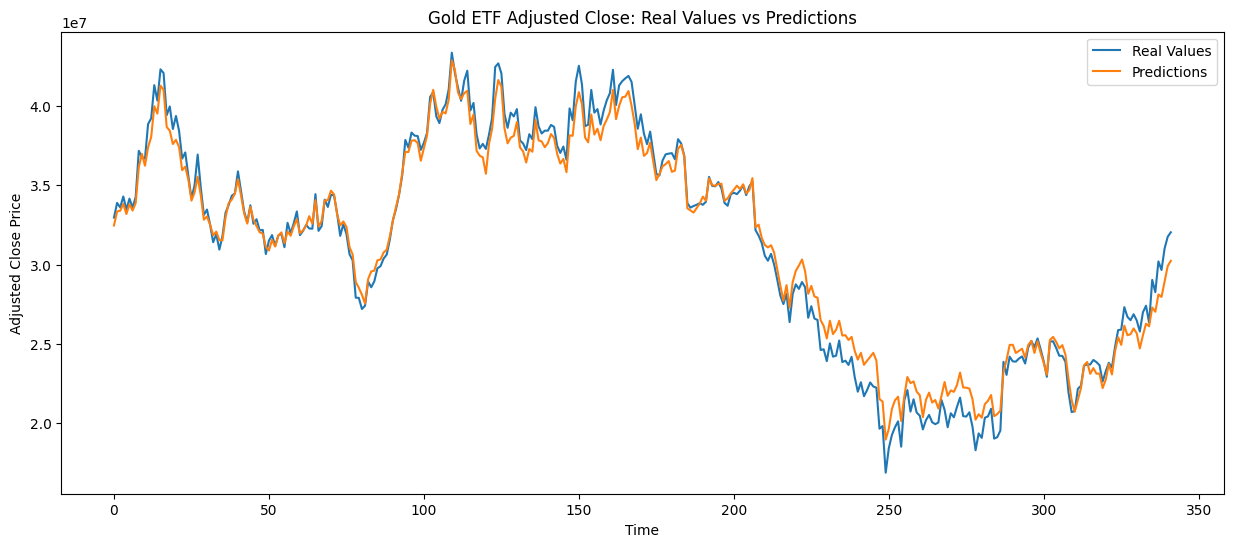

In [ ]:
# Visualize the predictions vs real values
plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Real Values')
plt.plot(y_pred_original, label='Predictions')
plt.title('Gold ETF Adjusted Close: Real Values vs Predictions')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/RealvsPredict.png')

plt.show()

In [ ]:
# Save the model to SavedModel Format
model.save('/content/drive/MyDrive/GoldPriceAI/LSTM_Model')

In [ ]:
# Save the model to a HDF5 Format
model.save('/content/drive/MyDrive/GoldPriceAI/LSTM_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            22200     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 62651 (244.73 KB)
Trainable params: 62651 (244.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Second LSTM Model

In [ ]:
file_path_drive = '/content/drive/MyDrive/GoldPriceAI/GLD_ETF.csv'
df_final = pd.read_csv(file_path_drive)
df_final = df_final[["Date", "Adj Close"]]

In [ ]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final.sort_values(by='Date', ascending=True, inplace=True)
df_final.reset_index(drop=True, inplace=True)
df_final.set_index('Date', inplace=True)

In [ ]:
type(df_final)

pandas.core.frame.DataFrame

In [ ]:
df_final

,Adj Close
Date,
2011-12-15,152.330002
2011-12-16,155.229996
2011-12-19,154.869995
2011-12-20,156.979996
2011-12-21,157.160004
...,...
2018-12-24,120.019997
2018-12-26,119.660004
2018-12-27,120.570000


In [ ]:
# Normalize the numeric values
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)

In [ ]:
type(normalized_data)

pandas.core.frame.DataFrame

In [ ]:
normalized_data

,Adj Close
0,0.708932
1,0.748598
2,0.743674
3,0.772534
4,0.774997
...,...
1713,0.266995
1714,0.262071
1715,0.274518
1716,0.281220


In [ ]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, target = [], []
    for i in range(len(data) - seq_length + 1):
        seq = data.iloc[i:i + seq_length]
        target_val = data.iloc[i + seq_length - 1]["Adj Close"]
        sequences.append(seq.values)
        target.append(target_val)
    return np.array(sequences), np.array(target)

In [ ]:
sequence_length = 10  # Adjust based on your requirements
X_sequences, y_sequences = create_sequences(normalized_data, sequence_length)

# Train-test split
train_size = int(len(X_sequences) * 0.8)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, train_size=train_size, shuffle=False)

In [ ]:
X_test[0]

array([[0.27219261],
       [0.27479135],
       [0.2619341 ],
       [0.26001917],
       [0.26480647],
       [0.28463955],
       [0.29694978],
       [0.30488306],
       [0.29298314],
       [0.29229931]])

In [ ]:
# Reshape the data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(df_final.columns)))

In [ ]:
X_train[0]

array([[0.70893176],
       [0.74859794],
       [0.74367384],
       [0.77253447],
       [0.77499662],
       [0.75967709],
       [0.76337023],
       [0.74422108],
       [0.6911503 ],
       [0.68171242]])

In [ ]:
X_train.shape[1]

10

In [ ]:
len(df_final.columns)

1

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with 1 neuron for regression tasks

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
43/43 [==============================] - 1s 19ms/step - loss: 2.0953e-04 - val_loss: 7.5876e-05
Epoch 2/50
43/43 [==============================] - 1s 18ms/step - loss: 2.0517e-04 - val_loss: 9.2426e-05
Epoch 3/50
43/43 [==============================] - 1s 19ms/step - loss: 1.6325e-04 - val_loss: 5.9140e-05
Epoch 4/50
43/43 [==============================] - 1s 18ms/step - loss: 1.5604e-04 - val_loss: 1.4773e-04
Epoch 5/50
43/43 [==============================] - 1s 17ms/step - loss: 1.4811e-04 - val_loss: 6.1258e-05
Epoch 6/50
43/43 [==============================] - 1s 17ms/step - loss: 1.3676e-04 - val_loss: 4.4937e-05
Epoch 7/50
43/43 [==============================] - 1s 18ms/step - loss: 1.1584e-04 - val_loss: 4.1061e-05
Epoch 8/50
43/43 [==============================] - 1s 18ms/step - loss: 1.0375e-04 - val_loss: 3.6009e-05
Epoch 9/50
43/43 [==============================] - 1s 25ms/step - loss: 8.9710e-05 - val_loss: 4.7961e-05
Epoch 10/50
43/43 [==================

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

11/11 [==============================] - 0s 6ms/step - loss: 3.9807e-06
Test Loss: 3.980685050919419e-06


In [ ]:
# Evaluate the model on the test set
y_pred_final = model.predict(X_test)

# Inverse transform the predictions to get them back to the original scale
y_pred_original_final = scaler.inverse_transform(y_pred_final)
y_test_original_final = scaler.inverse_transform(np.array(y_test).reshape(-1,1))

11/11 [==============================] - 0s 10ms/step


In [ ]:
# Calculate and print the evaluation metrics (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(y_test_original_final, y_pred_original_final))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.1458661307875318


In [ ]:
# Calculate R-squared
r2 = r2_score(y_test_original_final, y_pred_original_final)
print(f'R-squared: {r2}')

R-squared: 0.9990128672835279


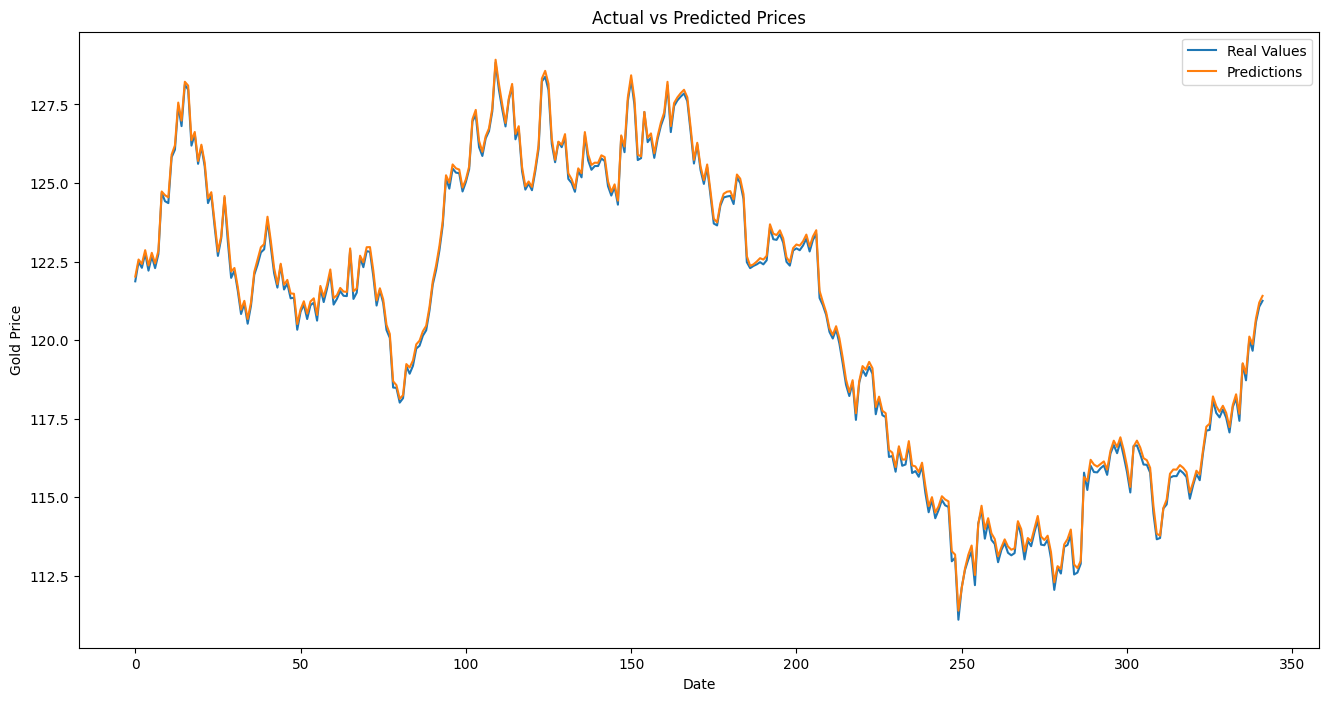

In [ ]:
# Visualize the predictions vs real values
plt.figure(figsize=(16, 8))
plt.plot(y_test_original_final.flatten(), label='Real Values')
plt.plot(y_pred_original_final.flatten(), label='Predictions')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()

# Save the plot to a file in your Google Drive folder
plt.savefig('/content/drive/MyDrive/GoldPriceAI/RealvsPredict_model2.png')

plt.show()

In [ ]:
# Save the model to SavedModel Format
model.save('/content/drive/MyDrive/GoldPriceAI/LSTM_Model2')

In [ ]:
# Save the model to a HDF5 Format
model.save('/content/drive/MyDrive/GoldPriceAI/LSTM_Model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
